In [1]:
%run setup.py

from configs import utils
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pl.Config.set_tbl_hide_column_data_types(True)

df_dog_info = utils.load_data("../data/raw", "DogInfo.csv")

In [2]:
df_dog_info.describe()

statistic,DogID,Breed,Weight,Age months,Gender,NeuteringStatus
"""count""",45.0,"""45""",45.0,45.0,45.0,45.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0
"""mean""",45.4,null,24.222222,58.044444,1.488889,0.333333
"""std""",17.411334,null,6.980131,29.309443,0.505525,0.476731
"""min""",16.0,"""Australian Kelpie""",13.0,16.0,1.0,0.0
"""25%""",29.0,null,20.0,32.0,1.0,0.0
"""50%""",47.0,null,23.0,56.0,1.0,0.0
"""75%""",59.0,null,28.0,84.0,2.0,1.0
"""max""",74.0,"""Vizsla""",41.0,116.0,2.0,1.0


In [3]:
df_dog_info.null_count()

DogID,Breed,Weight,Age months,Gender,NeuteringStatus
0,0,0,0,0,0


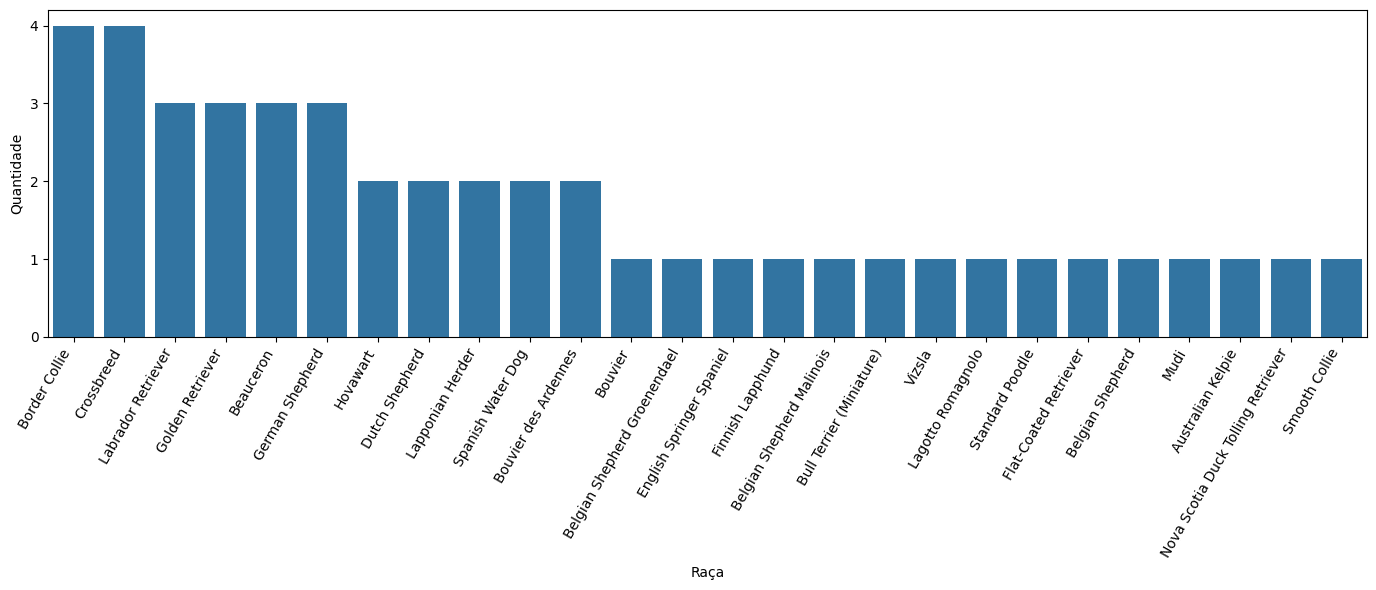

In [12]:
counts= df_dog_info.group_by('Breed').agg(pl.len().alias('count')).sort('count', descending=True)

plt.figure(figsize=(14, 6))
sns.barplot(x='Breed', y='count', data=counts)
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True)) # type: ignore
plt.savefig("../reports/figures/distribuicao_racas_caes.png")
plt.show()


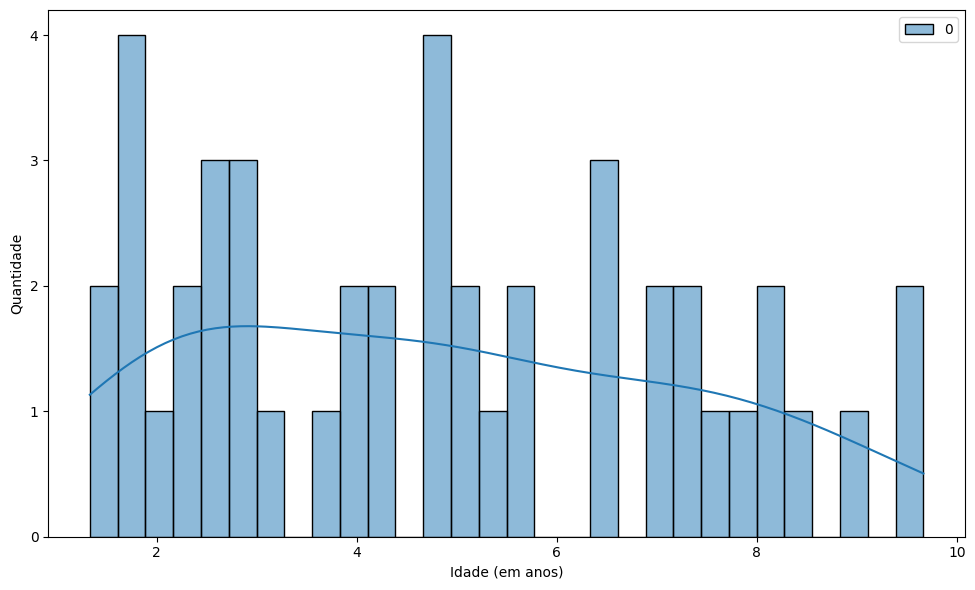

shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ Age      │
╞════════════╪══════════╡
│ count      ┆ 45.0     │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.837037 │
│ std        ┆ 2.442454 │
│ min        ┆ 1.333333 │
│ 25%        ┆ 2.666667 │
│ 50%        ┆ 4.666667 │
│ 75%        ┆ 7.0      │
│ max        ┆ 9.666667 │
└────────────┴──────────┘


In [14]:
df_dog_info = df_dog_info.with_columns(
    (pl.col("Age months") / 12).alias("Age")
)

plt.figure(figsize=(10, 6))
sns.histplot(df_dog_info.select("Age"), bins=30, kde=True)
plt.xlabel('Idade (em anos)')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True)) # type: ignore
plt.savefig("../reports/figures/distribuicao_idade_caes.png")
plt.show()

print(df_dog_info.select("Age").describe())

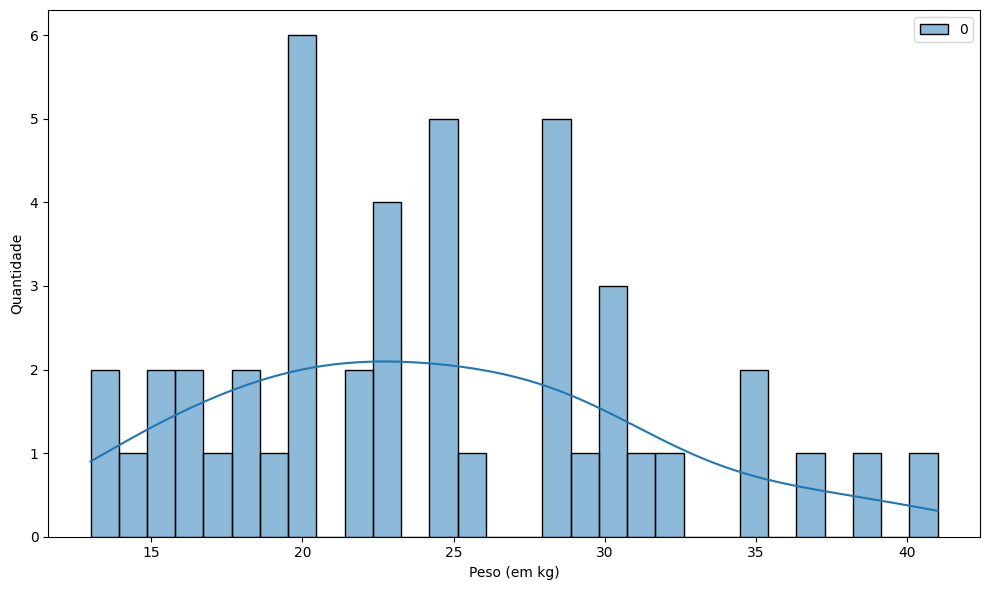

shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ Weight    │
╞════════════╪═══════════╡
│ count      ┆ 45.0      │
│ null_count ┆ 0.0       │
│ mean       ┆ 24.222222 │
│ std        ┆ 6.980131  │
│ min        ┆ 13.0      │
│ 25%        ┆ 20.0      │
│ 50%        ┆ 23.0      │
│ 75%        ┆ 28.0      │
│ max        ┆ 41.0      │
└────────────┴───────────┘


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df_dog_info.select("Weight"), bins=30, kde=True)
plt.xlabel('Peso (em kg)')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True)) # type: ignore
plt.savefig("../reports/figures/distribuicao_peso_caes.png")
plt.show()

print(df_dog_info.select("Weight").describe())


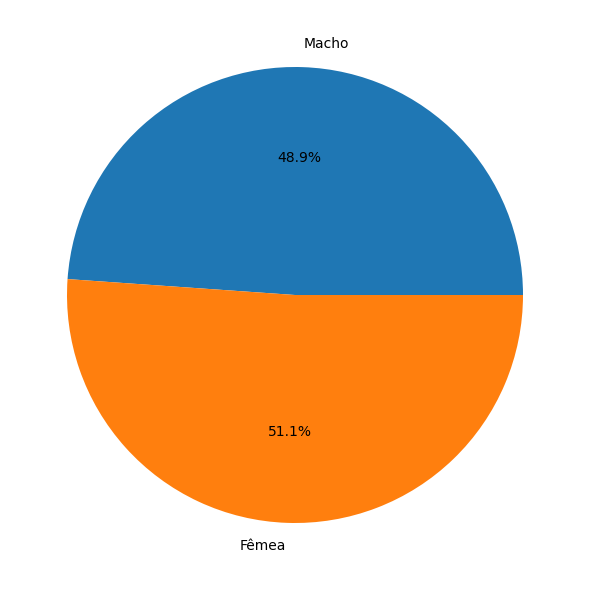

In [15]:
gender_counts = df_dog_info.group_by('Gender').agg(pl.len().alias('count'))

plt.figure(figsize=(8, 6))
plt.pie(gender_counts['count'], labels=("Macho", "Fêmea"), autopct='%1.1f%%')
plt.tight_layout()
plt.savefig("../reports/figures/distribuicao_sexo_caes.png")
plt.show()


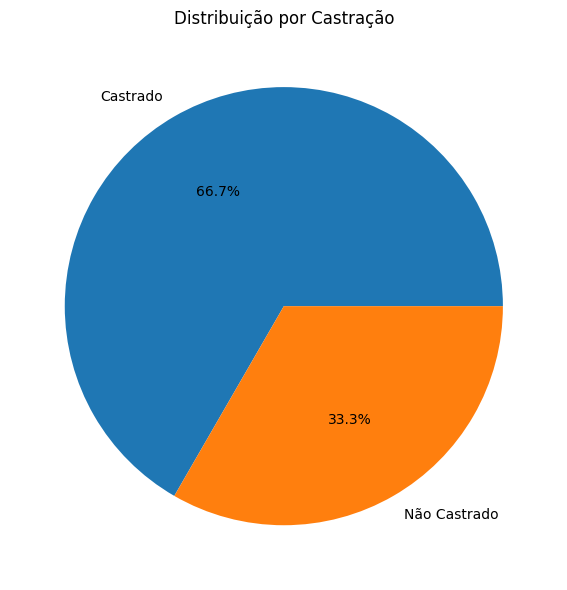

In [8]:
neutered_counts = df_dog_info.group_by('NeuteringStatus').agg(pl.len().alias('count'))

plt.figure(figsize=(8, 6))
plt.pie(neutered_counts['count'], labels=("Castrado", "Não Castrado"), autopct='%1.1f%%')
plt.title('Distribuição por Castração')
plt.tight_layout()
plt.savefig("../reports/figures/distribuicao_castracao_caes.png")
plt.show()
